<a href="https://colab.research.google.com/github/eskblog/troll-bot/blob/main/trolls_tweet_generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install -Uqq fastbook
import fastbook
#fastbook.setup_book()
!pip install transformers
import torch
import transformers
from transformers import pipeline

!pip install sklearn

     |████████████████████████████████| 727kB 25.0MB/s 
     |████████████████████████████████| 51kB 7.5MB/s 
     |████████████████████████████████| 1.2MB 25.8MB/s 
     |████████████████████████████████| 204kB 50.2MB/s 
     |████████████████████████████████| 61kB 9.2MB/s 
     |████████████████████████████████| 61kB 9.2MB/s 
     |████████████████████████████████| 2.3MB 25.3MB/s 
     |████████████████████████████████| 901kB 53.4MB/s 
     |████████████████████████████████| 3.3MB 39.9MB/s 




# Import tweets and build training and test sets

Drawing on code found in https://towardsdatascience.com/fine-tune-a-non-english-gpt-2-model-with-huggingface-9acc2dc7635b

For this to work, download this zip file: https://www.kaggle.com/fivethirtyeight/russian-troll-tweets

Next, extract it to a Google Drive directory and, mounting it on Google Colab paste the target directory address in the FOLDER_PATH below:

In [56]:
import re
from sklearn.model_selection import train_test_split
import pandas as pd

In [57]:
FOLDER_PATH = "/content/drive/MyDrive/Colab Notebooks/Personal projects/Trolls/Data" #to be replaced by user with correct path where the CSV files are
CSV_FILENAME = "IRAhandle_tweets_1.csv" #to save time on training, we use only the first of a number of CSV files. It has enough tweets to be useful

MODEL_PATH = "/content/drive/MyDrive/Colab Notebooks/Personal projects/Trolls/trolls-gpt2-model" #this is where the GPT-2 model will be saved and loaded from

tweets = pd.read_csv(FOLDER_PATH+"/"+CSV_FILENAME)
tweets.head(2)
eng_tweets = tweets[tweets.language == "English"] #filter to English tweets only
eng_tweets.head()

,external_author_id,author,content,region,language,publish_date,harvested_date,following,followers,updates,post_type,account_type,new_june_2018,retweet,account_category
0,9.060000e+17,10_GOP,"""We have a sitting Democrat US Senator on trial for corruption and you've barely heard a peep from the mainstream media."" ~ @nedryun https://t.co/gh6g0D1oiC",Unknown,English,10/1/2017 19:58,10/1/2017 19:59,1052,9636,253,NaN,Right,0,0,RightTroll
1,9.060000e+17,10_GOP,Marshawn Lynch arrives to game in anti-Trump shirt. Judging by his sagging pants the shirt should say Lynch vs. belt https://t.co/mLH1i30LZZ,Unknown,English,10/1/2017 22:43,10/1/2017 22:43,1054,9637,254,NaN,Right,0,0,RightTroll
2,9.060000e+17,10_GOP,"Daughter of fallen Navy Sailor delivers powerful monologue on anthem protests, burns her NFL packers gear. #BoycottNFL https://t.co/qDlFBGMeag",Unknown,English,10/1/2017 22:50,10/1/2017 22:51,1054,9637,255,RETWEET,Right,0,1,RightTroll
3,9.060000e+17,10_GOP,"JUST IN: President Trump dedicates Presidents Cup golf tournament trophy to the people of Florida, Texas and Puerto Rico. https://t.co/z9wVa4djAE",Unknown,English,10/1/2017 23:52,10/1/2017 23:52,1062,9642,256,NaN,Right,0,0,RightTroll
4,9.060000e+17,10_GOP,"19,000 RESPECTING our National Anthem! #StandForOurAnthem🇺🇸 https://t.co/czutyGaMQV",Unknown,English,10/1/2017 2:13,10/1/2017 2:13,1050,9645,246,RETWEET,Right,0,1,RightTroll


In [ ]:
train, test = train_test_split(eng_tweets[:10000], test_size = 0.15) #take a limited number of tweets to speed up processing

def build_text_file(pd_column, dest_path):
  """Write the contents of a pandas column to a text file"""
  f = open(dest_path, "w")
  data = ''
  for text in pd_column:
    line = str(text).strip()
    line = re.sub(r"\s", " ", line)
    data += line + " " #note that we are not adding a line break...
  print(data[:3000]) #for inspection
  f.write(data)

build_text_file(train['content'], "traintext.txt")
build_text_file(test['content'], "testtext.txt")

#IStartCryingWhen I get slapped in the face and shoved into traffic. Photo: Yesterday, 32-year-old Philadelphia police officer Matthew Zagursky was caught on a video extorting... http://t.co/D6TZDE2UJZ #abi Grassroots Conservative Group Calls on Senate GOP to DITCH MITCH! https://t.co/HAfpo4Js59 #ABISS https://t.co/CitZRKcdFs BREAKING: Russia-backed #SyrianArmy advances on #Daesh-held #Palmyra, less than 20 km left https://t.co/qht9pujmvU #SyriaCrisis https://t.co/1ZDbtgfxY6 Me: let's make today a good day Also me: do you like my hoodie I got it for my birthday https://t.co/MKCeAXUt4N I'm a bad politician #SaidNoOneEver http://t.co/2uusTwBRBC #happyme I’m happiest when my music touches the lives of all people: from black 2 white, young 2 old, straight 2 gay https://t.co/L9slMMtcwE #Rihanna #star #awesome http://t.co/P03TqNJ4g7 #abi Mueller’s WITCH-HUNT Team Just Lost a Major Player! https://t.co/sxGjnUCTgL #ABISS https://t.co/Yg28RUl5Ns RT @smushinga: Lol funniest comment about #Desiig

In [ ]:
train

,external_author_id,author,content,region,language,publish_date,harvested_date,following,followers,updates,post_type,account_type,new_june_2018,retweet,account_category
16722,2.534421e+09,ABIGAILSSILK,#IStartCryingWhen I get slapped in the face and shoved into traffic.,United States,English,8/8/2016 14:27,8/8/2016 14:30,500,614,1435,NaN,Hashtager,0,0,HashtagGamer
8042,3.312143e+09,4MYSQUAD,"Photo: Yesterday, 32-year-old Philadelphia police officer Matthew Zagursky was caught on a video extorting... http://t.co/D6TZDE2UJZ",United States,English,8/22/2015 7:37,8/22/2015 7:37,1652,305,489,NaN,left,0,0,LeftTroll
16894,8.930000e+17,ABIISSROSB,#abi Grassroots Conservative Group Calls on Senate GOP to DITCH MITCH! https://t.co/HAfpo4Js59 #ABISS https://t.co/CitZRKcdFs,United States,English,8/12/2017 18:43,8/12/2017 18:44,966,510,450,NaN,Right,0,0,RightTroll
14496,8.310000e+17,AARON_M1TCHELL,"BREAKING: Russia-backed #SyrianArmy advances on #Daesh-held #Palmyra, less than 20 km left https://t.co/qht9pujmvU #SyriaCrisis https://t.co/1ZDbtgfxY6",Unknown,English,2/13/2017 22:28,2/13/2017 22:28,41,0,3,RETWEET,Koch,0,1,Fearmonger
6694,4.036537e+09,4MYSQUAD,Me: let's make today a good day Also me: do you like my hoodie I got it for my birthday https://t.co/MKCeAXUt4N,United States,English,11/17/2016 13:23,11/17/2016 13:23,4004,4776,1526,RETWEET,left,0,1,LeftTroll
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13253,1.709314e+09,AANTIRACIST,"""The babies you murder"" And this is how terrorism starts. Religious extremists imposing their ignorance on others. https://t.co/bEPmzJ4lZP",United States,English,1/4/2016 1:08,1/4/2016 1:08,486,221,700,RETWEET,left,0,1,LeftTroll
9843,3.312143e+09,4MYSQUAD,#cop doesn't like #citizen knowing his #rights #PoliceBrutality #policeAbuse #cops #acab http://t.co/QlrjkAXgn5,United States,English,9/30/2015 12:01,9/30/2015 12:01,1917,861,3328,NaN,left,0,0,LeftTroll
11132,7.140000e+17,666STEVEROGERS,GEMINI: why do you obsess about time travel? what is it about the thought of going back that haunts you when you try to sleep?,Unknown,English,4/25/2017 2:00,4/25/2017 2:01,100,7,30,RETWEET,?,0,1,Unknown
5461,3.312143e+09,4MYSQUAD,"This is what i call a real struggle in America people have to eat,too http://t.co/MphpjVkQVj",United States,English,10/11/2015 23:16,10/11/2015 23:16,2000,1105,4114,NaN,left,0,0,LeftTroll


In [4]:
#get GPT 2 tokenizer

from transformers import GPT2Tokenizer, GPT2Model

tokenizer = GPT2Tokenizer.from_pretrained("gpt2")

test_path = "/content/testtext.txt" #set the path for where the test and train strings will be saved
train_path = "/content/traintext.txt"

In [ ]:
#now we create a TextDataset
from transformers import TextDataset, DataCollatorForLanguageModeling
#note to self: may need to replace TextDataset due to update to library

train_dataset = TextDataset(
    tokenizer = tokenizer,
    file_path = train_path,
    block_size = 128)

test_dataset = TextDataset(
    tokenizer = tokenizer,
    file_path = test_path,
    block_size = 128)

#this is somehow used to form a batch...
data_collator = DataCollatorForLanguageModeling(
        tokenizer=tokenizer, mlm=False)


#so now we have converted our text files into training and testing data that can be read by the neural net (?)

/usr/local/lib/python3.7/dist-packages/transformers/data/datasets/language_modeling.py:58: FutureWarning: This dataset will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/master/examples/pytorch/language-modeling/run_mlm.py
  FutureWarning,


In [ ]:
#now we initialize a TRAINER
from transformers import Trainer, TrainingArguments, AutoModelWithLMHead

model = model = AutoModelWithLMHead.from_pretrained("gpt2")

#here we set the learning parameters
training_args = TrainingArguments(
    output_dir="./gpt2-trolls", #The output directory
    overwrite_output_dir=True, #overwrite the content of the output directory
    num_train_epochs=6, # number of training epochs
    per_device_train_batch_size=32, # batch size for training
    per_device_eval_batch_size=64,  # batch size for evaluation
    eval_steps = 400, # Number of update steps between two evaluations.
    save_steps=800, # after # steps model is saved
    warmup_steps=500,# number of warmup steps for learning rate scheduler
    prediction_loss_only=True,
    )

#create the trainer
trainer = Trainer(
    model=model,
    args=training_args, #as you can see here we are passing the parameters creating above
    data_collator=data_collator,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    #prediction_loss_only=True,
)

/usr/local/lib/python3.7/dist-packages/transformers/models/auto/modeling_auto.py:810: FutureWarning: The class `AutoModelWithLMHead` is deprecated and will be removed in a future version. Please use `AutoModelForCausalLM` for causal language models, `AutoModelForMaskedLM` for masked language models and `AutoModelForSeq2SeqLM` for encoder-decoder models.
  FutureWarning,


In [ ]:
nd

# Now train the pre-trained model and then save the model

In [ ]:
trainer.train()

Step,Training Loss


TrainOutput(global_step=396, training_loss=4.187208079328441, metrics={'train_runtime': 475.9372, 'train_samples_per_second': 0.832, 'total_flos': 1201312040878080.0, 'epoch': 6.0, 'init_mem_cpu_alloc_delta': 2104594432, 'init_mem_gpu_alloc_delta': 511148032, 'init_mem_cpu_peaked_delta': 0, 'init_mem_gpu_peaked_delta': 0, 'train_mem_cpu_alloc_delta': 12132352, 'train_mem_gpu_alloc_delta': 1521358336, 'train_mem_cpu_peaked_delta': 0, 'train_mem_gpu_peaked_delta': 8584833024})

In [ ]:
trainer.save_model(MODEL_PATH)

# Build a pipeline with the model

In [58]:
from transformers import pipeline
trollsbot = pipeline('text-generation', model = MODEL_PATH, tokenizer = tokenizer, config={'max_length':800})


In [6]:
result = trollsbot("SCIENCE is")[0]['generated_text'] #testing it
result

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


"SCIENCE is #racism.' https://t.co/m9fRczTqSn #BlackLivesMatter #ABISS https://t.co/4oJ0R7qvJ3 #Stay"

# Creating a Twitter bot

In [7]:
!pip install textwrap3

In [59]:
#tweet screenshot generator

from textwrap3 import wrap #to divide text into lines


from PIL import Image, ImageDraw, ImageFont
import requests
import io

def screenshot(textbody):
  """Draws screenshot of the generated Tweet"""

  
  img = Image.new('RGB', (810, 220), color = "white")

  #username logo -- HACKER
  logo_url = "https://cdn.pixabay.com/photo/2017/11/27/07/50/putin-2980748_960_720.jpg" #profile picture of the fake twitter user
  logo = Image.open(requests.get(logo_url, stream=True).raw)
  logo.thumbnail((63, 63)) #shrink logo
  img.paste(logo, box = (20, 43)) #place logo

  #create drawing instance
  d = ImageDraw.Draw(img)

  #set up fonts for the image
  droidsans = requests.get('https://github.com/ProgrammingFonts/ProgrammingFonts/raw/master/Droid-Sans-Mono/droid-sans-mono-1.00/Droid%20Sans%20Mono.ttf', allow_redirects=True)

  namefont = ImageFont.truetype(io.BytesIO(droidsans.content), size=29)
  handlefont = ImageFont.truetype(io.BytesIO(droidsans.content), size=21)
  textfont = ImageFont.truetype(io.BytesIO(droidsans.content), size=24)

  #write name and username of account
  d.text((100,42), "Troll McDuck", fill=("black"), font=namefont)
  d.text((310,48), "@russkymir", fill=("grey"), font=handlefont)

  #divide tweet into lines and print separately
  textlines = wrap(textbody, width=40)
  lineheight = 28
  firstline_y=80
  linecount = 0
  for line in textlines:
    d.text((100,firstline_y+linecount*lineheight), line, fill=("dimgray"), font=textfont)
    linecount += 1
  
  display(img)

Type start of tweet: Hillary should


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


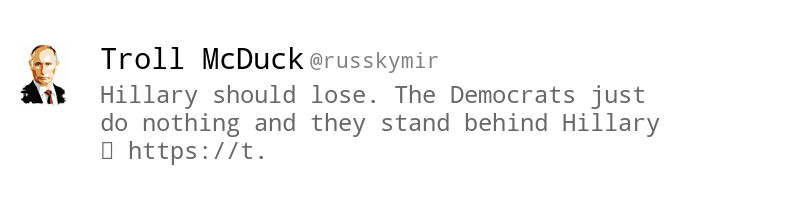

In [80]:

def generate_tweet(start):
  result = trollsbot(start)[0]['generated_text']
  punctuation = "!?.;"
  shortresult = ""
  
  #make sure end result only something with punctuation
  for i in range(1, len(result)):
    if result[-i] in punctuation:
      shortresult = result[:-i+1]
      break
  if len(shortresult) != 0: #if a punctuation was found
    return shortresult
  else:
    return generate_tweet(start) #call itself if no punctuation in this one


#working troll bot
start = input("Type start of tweet: ")
shortresult = generate_tweet(start)
screenshot(shortresult)

SyntaxError: ignored